###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt

import missingno as msno
sns.set()

import random
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier


[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]



Columns Description:
* Country - Country
* Year - Year
* Status - Developed or Developing status
* Life expectancy - Life Expectancy in age
* Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expediture - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* under-five deaths - Number of under-five deaths per 1000 population
* Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expediture - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - Gross Domestic Product per capita (in USD)
* Population - Population of the country
* thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9 (%)
* Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling



###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

b) as informações estatísticas básicas das colunas do dataset;

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


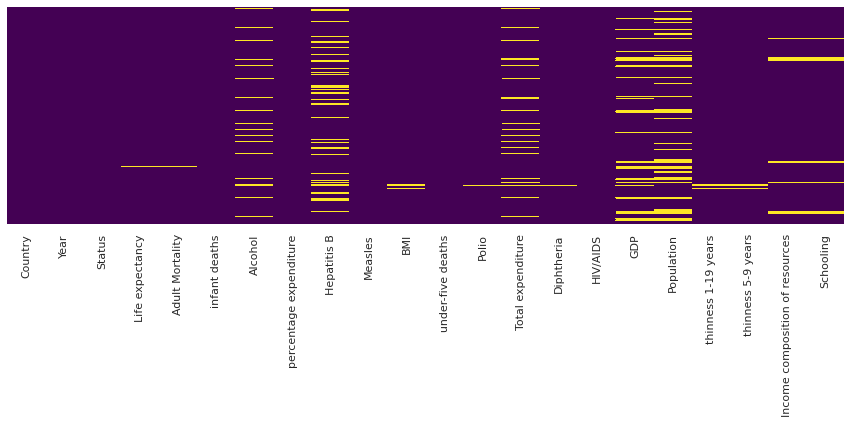

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

c) se há dados faltantes e decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas as colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [ ]:
df.drop(['Year', 'Country','GDP', 'Population', 'Hepatitis B', 'infant deaths'], axis=1, inplace=True)

In [ ]:
status = pd.get_dummies(df['Status'])
df = pd.concat([df, status], axis=1)
df.drop(['Status', 'Developed'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2556 non-null   float64
 1   Adult Mortality                  2556 non-null   float64
 2   Alcohol                          2556 non-null   float64
 3   percentage expenditure           2556 non-null   float64
 4   Measles                          2556 non-null   int64  
 5   BMI                              2556 non-null   float64
 6   under-five deaths                2556 non-null   int64  
 7   Polio                            2556 non-null   float64
 8   Total expenditure                2556 non-null   float64
 9   Diphtheria                       2556 non-null   float64
 10  HIV/AIDS                         2556 non-null   float64
 11  thinness 1-19 years              2556 non-null   float64
 12  thinness 5-9 years  

d) a matriz de correlação das entradas com a saída;

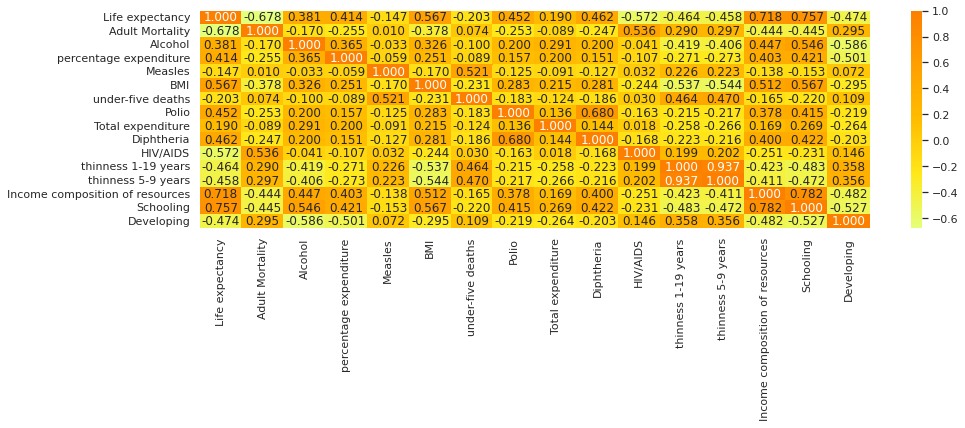

In [ ]:
sns.heatmap(df.corr(), cmap="Wistia", annot=True, fmt='.3f')
plt.show()

e) quais as features que mais possuem correlação (negativa ou positivamente) com a saída?

In [ ]:
# Maiores Correlação positiva com a fetarure 'Life expectancy':
'''
1. Schooling
2. Income composition of resources
3. BMI
'''

# Maiores Correlação negativa com a fetarure 'Life expectancy':
'''
1. Adult Mortality
2. HIV/AIDS
3. Thinness 5-9 years e Thinness 1-19 years
'''

f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

In [ ]:
# Thinness 5-9 years e Thinness 1-19 years pois possuem correlação entre si de 0.94

g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

In [ ]:
# Thinness 5-9 years pois possui menor correlação com a feature 'Life expectancy'  

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

In [ ]:
# Acredito que sim, pois há várias features com correlação expressiva com a saída.

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()  
scaler.fit(X_train[['Schooling', 'Income composition of resources', 'BMI', 'Adult Mortality', 'HIV/AIDS', 'thinness 5-9 years', 'thinness 1-19 years']])

X_train_scaled[['Schooling', 'Income composition of resources', 'BMI', 'Adult Mortality', 'HIV/AIDS', 'thinness 1-19 years', 'thinness 1-19 years']] = scaler.transform(X_train[['Schooling', 'Income composition of resources', 'BMI', 'Adult Mortality', 'HIV/AIDS', 'thinness 5-9 years', 'thinness 1-19 years']])  
X_test_scaled[['Schooling', 'Income composition of resources', 'BMI', 'Adult Mortality', 'HIV/AIDS', 'thinness 5-9 years', 'thinness 1-19 years']] = scaler.transform(X_test[['Schooling', 'Income composition of resources', 'BMI', 'Adult Mortality', 'HIV/AIDS', 'thinness 5-9 years', 'thinness 1-19 years']])
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 599 to 982
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  1789 non-null   float64
 1   Alcohol                          1789 non-null   float64
 2   percentage expenditure           1789 non-null   float64
 3   Measles                          1789 non-null   int64  
 4   BMI                              1789 non-null   float64
 5   under-five deaths                1789 non-null   int64  
 6   Polio                            1789 non-null   float64
 7   Total expenditure                1789 non-null   float64
 8   Diphtheria                       1789 non-null   float64
 9   HIV/AIDS                         1789 non-null   float64
 10  thinness 1-19 years              1789 non-null   float64
 11  thinness 5-9 years               1789 non-null   float64
 12  Income composition 

###5. Execute a Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [ ]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)

preditions_val = model.predict(X_test_scaled)

#plt.plot(X_train_scaled, model.predict(X_test), color = 'red')

print(preditions_val)

In [ ]:
result = abs(y_test - preditions_val)
result.mean()

2.955609067950021

###6. Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

#### 6.1 Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

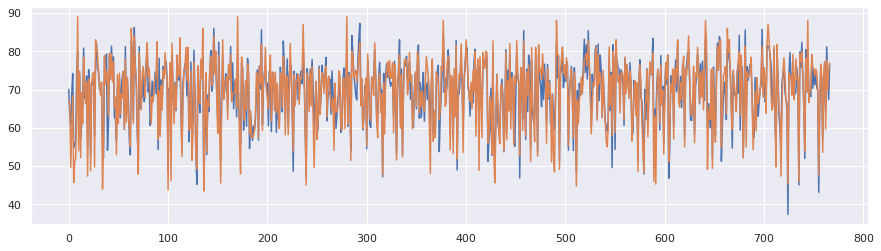

In [ ]:
x_grf = list(range(len(preditions_val)))

plt.plot(x_grf, preditions_val)
plt.plot(x_grf, y_test)
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

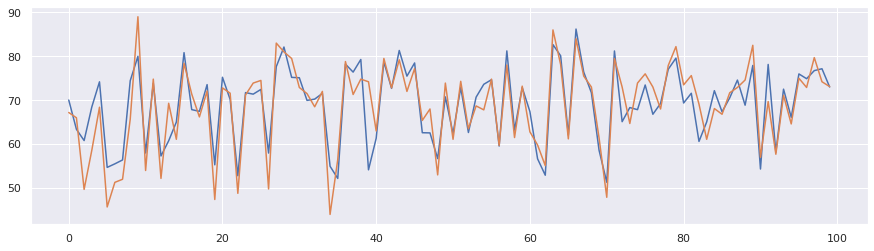

In [ ]:
first_X = preditions_val[:100]
first_y = y_test[:100]

x_grf1 = list(range(len(first_X)))

plt.plot(x_grf1, first_X)
plt.plot(x_grf1, first_y)
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

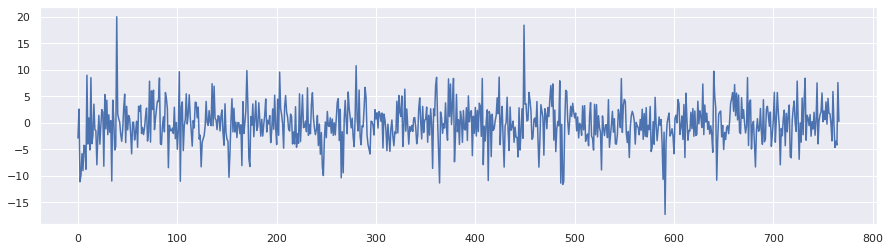

In [ ]:
residuals = y_test - preditions_val

x_grf2 = list(range(len(residuals)))

plt.plot(x_grf2, residuals)
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

In [ ]:
# O erro se concentra na faixa do 0 e oscila em sua maior parte entre 5 e -5 
# demonstrando que o valor predito está próximo do real.

####6.2 Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (RMSE e R2) e verifique se sua impressão visual se confirma.

In [ ]:
print("RMSE: {0}".format(mean_squared_error(y_test, preditions_val, squared=False)))

print('Variance score: %.2f' % r2_score(y_test, preditions_val))

RMSE: 3.923982980442832
Variance score: 0.81


In [ ]:
# O baixo valor de RMSE indica uma menor quantidade de erros de predição
# O valor de R2 está bem próximo a 1 indicando que o modelo se ajusta bem aos dados
# Desta forma as impressões demonstradas nos gráficos foram confirmadas pelas métrica apresentadas.

####6.3 Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
score = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Média do R2: { score.mean():.3f}')

Média do R2: 0.820
